In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob


In [88]:
amazon_reviews = pd.read_csv("amazon_cells_labelled.txt",sep="\t",header=None)

In [89]:
amazon_reviews.columns = ['Review','Label']

In [95]:
bad_keywords = ['no', 'waste', 'not', 'disappointed','only', 'junk', 'problem']

for key in bad_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews[str(key)] = amazon_reviews.Review.str.contains(
        ' ' + str(key) + ' '
    )

In [96]:
amazon_reviews['Label'] = (amazon_reviews['Label'] == 0)

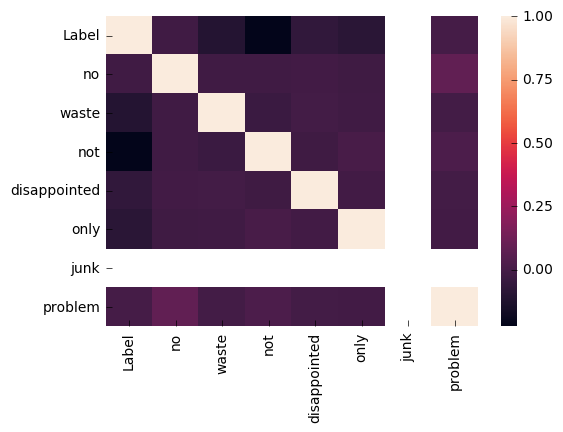

In [97]:
sns.heatmap(amazon_reviews.corr())

In [98]:
data = amazon_reviews[bad_keywords + ['Label']]
target = amazon_reviews['Review']

In [99]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of bad reviews out of {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of bad reviews out of 1000 points : 991
